# LB Weigths
by Manuel A. Diaz @ NTU 2014

Refs:
1. He, X., & Luo, L. S. (1997). Theory of the lattice Boltzmann method: From the Boltzmann equation to the lattice Boltzmann equation. Physical review E, 56(6), 6811.
2. Wagner, A. J. (2008). A practical introduction to the lattice Boltzmann method. Adt. notes for Statistical Mechanics, 463(2008), 663.
3. Dellar, P. J. (2005). Lattice and discrete Boltzmann equations for fully compressible flow. Computational Fluid and Solid Mechanics, 632-635.
4. Yang, L. M., Shu, C., & Wu, J. (2012). Development and comparative studies of three non-free parameter lattice Boltzmann models for simulation of compressible flows. Advances in Applied Mathematics and Mechanics, 4(4), 454-472.

## Preamble

In [35]:
# Load numpy and everything from sympy
import sympy as sp
sp.init_printing(use_unicode=True, use_latex=True, fontsize='16pt')

## D2Q9 & D3Q19 Lattice Weights [1]

Here are the weights for the D2Q9 and D3Q19 lattices as given by He & Luo (1997) [1].

In [36]:
# Basic simbolic variables
rho, Rgas, T, D = sp.symbols('rho R T D')
u_bold, xi_bold = sp.symbols('u xi', cls=sp.Symbol, bold=True)
RT = Rgas * T

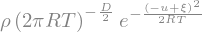

In [37]:
# Equilibrium distribution function
amplitude = rho / (2 * sp.pi * RT)**(D/2)
gaussian = sp.exp(-((xi_bold-u_bold)**2)/(2*RT))
g = amplitude * gaussian
display(g)

True


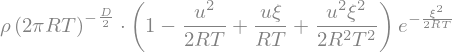

In [38]:
# Expand the gaussian distribution up to second order terms
order = 2

# Re-write the gaussian distribution as a product of three terms
gaussian1 = sp.exp(-(xi_bold**2)/(2*RT))
gaussian2 = sp.exp( (u_bold*xi_bold)/(RT))
gaussian3 = sp.exp(-(u_bold**2)/(2*RT))
print(gaussian.expand() == (gaussian1 * gaussian2 * gaussian3))

# Expand the gaussian distribution up to second order terms
g_LBM = amplitude * gaussian1 * \
    ((
    gaussian2.series(u_bold, 0, order+1) * 
    gaussian3.series(u_bold, 0, order+1)
    ).expand()).removeO()
g_LBM

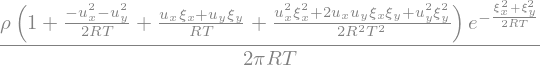

In [39]:
# For 2D case (D=2) we have:
ux, uy, xix, xiy = sp.symbols('u_x u_y xi_x xi_y')
u = sp.Matrix([ux, uy])
xi = sp.Matrix([xix, xiy])

# Substitute the bold symbols
g_LBM2D = g_LBM.subs(D, 2)
g_LBM2D = g_LBM2D.subs(u_bold**2 * xi_bold**2, (u.dot(xi)**2).expand())
g_LBM2D = g_LBM2D.subs(u_bold**2, u.dot(u))
g_LBM2D = g_LBM2D.subs(u_bold * xi_bold, u.dot(xi))
g_LBM2D = g_LBM2D.subs(xi_bold**2, xi.dot(xi))
g_LBM2D

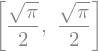

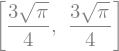

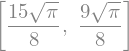

In [40]:
# Gauss-Hermite quadrature rule
zeta, m = sp.symbols('zeta m')

# Symbolic integration (Exact)
Iexact = sp.Lambda(m, sp.integrate(sp.exp(-zeta**2) * zeta**m, (zeta, -sp.oo, sp.oo)))

# Abscissas & weights for the Gauss-Hermite quadrature
x = sp.Matrix([-sp.sqrt(6) / 2, 0, sp.sqrt(6) / 2])
w = sp.Matrix([sp.sqrt(sp.pi) / 6, 2 * sp.sqrt(sp.pi) / 3, sp.sqrt(sp.pi) / 6])

# Numerical integration
I = sp.Lambda(m, w.dot(x.applyfunc(lambda elem: elem**m)))

# Compare the exact and numerical integration
display([Iexact(0), I(0)])
display([Iexact(1), I(1)])
display([Iexact(2), I(2)])
display([Iexact(3), I(3)])
display([Iexact(4), I(4)])
display([Iexact(5), I(5)]) # This is the maximum order we can integrate with this quadrature
display([Iexact(6), I(6)]) # NOTE: observed the error for moment of order 6

In [1], He & Lou identified the weights for the D2Q9 and D3Q27 lattices by comparing the continuous integral formulation with its numerical counter part using Guass Hermite quadrature rule. Provided that the integral factor is clearly identified, the weigths are explicitly obtained as:

### D2Q9 Lattice

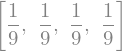

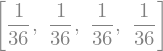

In [41]:
pi = sp.pi
display([w[1] * w[1] / pi])
display([w[1] * w[0] / pi, 
         w[0] * w[1] / pi, 
         w[1] * w[2] / pi, 
         w[2] * w[1] / pi])
display([w[0] * w[0] / pi, 
         w[0] * w[2] / pi, 
         w[2] * w[0] / pi, 
         w[2] * w[2] / pi])

### D3Q27 Lattice

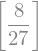

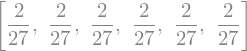

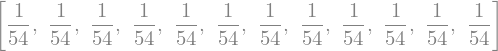

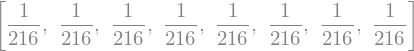

In [42]:
piPowThreeHalfs = sp.sqrt(sp.pi**3)
display([w[1] * w[1] * w[1] / piPowThreeHalfs])
display([w[1] * w[1] * w[0] / piPowThreeHalfs,
         w[1] * w[1] * w[2] / piPowThreeHalfs,
         w[0] * w[1] * w[1] / piPowThreeHalfs,
         w[2] * w[1] * w[1] / piPowThreeHalfs,
         w[1] * w[0] * w[1] / piPowThreeHalfs,
         w[1] * w[2] * w[1] / piPowThreeHalfs]) 
display([w[1] * w[0] * w[0] / piPowThreeHalfs,
         w[1] * w[2] * w[2] / piPowThreeHalfs,
         w[0] * w[1] * w[0] / piPowThreeHalfs,
         w[2] * w[1] * w[2] / piPowThreeHalfs,
         w[0] * w[0] * w[1] / piPowThreeHalfs,
         w[2] * w[0] * w[1] / piPowThreeHalfs,
         w[1] * w[2] * w[0] / piPowThreeHalfs,
         w[1] * w[0] * w[2] / piPowThreeHalfs,
         w[2] * w[1] * w[0] / piPowThreeHalfs,
         w[0] * w[1] * w[2] / piPowThreeHalfs,
         w[0] * w[2] * w[1] / piPowThreeHalfs,
         w[2] * w[0] * w[1] / piPowThreeHalfs]) 
display([w[0] * w[0] * w[0] / piPowThreeHalfs,
         w[2] * w[0] * w[0] / piPowThreeHalfs,
         w[0] * w[2] * w[0] / piPowThreeHalfs,
         w[0] * w[0] * w[2] / piPowThreeHalfs,
         w[2] * w[2] * w[0] / piPowThreeHalfs,
         w[0] * w[2] * w[2] / piPowThreeHalfs,
         w[2] * w[0] * w[2] / piPowThreeHalfs,
         w[2] * w[2] * w[2] / piPowThreeHalfs])

However, it there are more systematic ways to obtain the weights. For instance, in [2], Wagner proposed a method to obtain the weights by solving a linear system of equations. In [3], Yang et al. proposed a method to obtain the weights by minimizing the error between the continuous and discrete integral formulations.

## Moments of $f^{eq}$ : micro-velocities as invariants

In [43]:
vx, ux = sp.symbols('v_x u_x', real=True)
vy, uy = sp.symbols('v_y u_y', real=True)
vz, uz = sp.symbols('v_z u_z', real=True)
n, th = sp.symbols('n theta', positive=True, real=True)

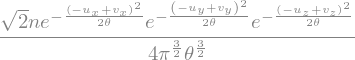

In [44]:
g = n / (2 * sp.pi * th)**(sp.Rational(3,2)) * \
    sp.exp(-((vx-ux)**2)/(2*th)) * \
        sp.exp(-((vy-uy)**2)/(2*th)) * \
            sp.exp(-((vz-uz)**2)/(2*th))
display(g)

In [45]:
sp.integrate(
    sp.integrate(
        sp.integrate(g, (vz, -sp.oo, sp.oo)), (vy, -sp.oo, sp.oo)), (vx, -sp.oo, sp.oo))

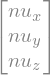

In [46]:
v_bold = sp.Matrix([vx, vy, vz])
sp.integrate(
    sp.integrate(
        sp.integrate(g * v_bold, (vz, -sp.oo, sp.oo)), (vy, -sp.oo, sp.oo)), (vx, -sp.oo, sp.oo))

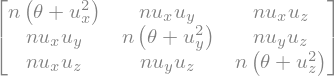

In [47]:
V = v_bold * v_bold.T
sp.integrate(
    sp.integrate(
        sp.integrate(g * V, (vz, -sp.oo, sp.oo)), (vy, -sp.oo, sp.oo)), (vx, -sp.oo, sp.oo)).simplify()

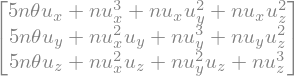

In [48]:
Vv = V * v_bold
sp.integrate(
    sp.integrate(
        sp.integrate(g * Vv, (vz, -sp.oo, sp.oo)), (vy, -sp.oo, sp.oo)), (vx, -sp.oo, sp.oo)).simplify().expand()

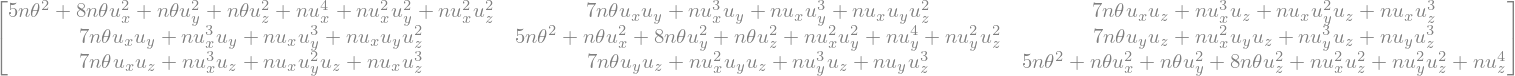

In [49]:
Vv2 = V * v_bold.dot(v_bold)
sp.integrate(
    sp.integrate(
        sp.integrate(g * Vv2, (vz, -sp.oo, sp.oo)), (vy, -sp.oo, sp.oo)), (vx, -sp.oo, sp.oo)).simplify().expand()

In [50]:
v2 = v_bold.dot(v_bold)
sp.integrate(
    sp.integrate(
        sp.integrate(g * v2, (vz, -sp.oo, sp.oo)), (vy, -sp.oo, sp.oo)), (vx, -sp.oo, sp.oo)).simplify().expand()

## Moments of $f^{eq}$ : peculiar-velocities as invariants

In [51]:
cx = sp.symbols('c_x', real=True)
cy = sp.symbols('c_y', real=True)
cz = sp.symbols('c_z', real=True)
n, th = sp.symbols('n theta', positive=True, real=True)

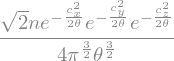

In [52]:
g = n / (2 * sp.pi * th)**(sp.Rational(3,2)) * \
    sp.exp(-(cx**2)/(2*th)) * \
        sp.exp(-(cy**2)/(2*th)) * \
            sp.exp(-(cz**2)/(2*th))
display(g)

In [53]:
sp.integrate(
    sp.integrate(
        sp.integrate(g, (cz, -sp.oo, sp.oo)), (cy, -sp.oo, sp.oo)), (cx, -sp.oo, sp.oo))

In [54]:
c_bold = sp.Matrix([cx, cy, cz])
sp.integrate(
    sp.integrate(
        sp.integrate(g * c_bold, (cz, -sp.oo, sp.oo)), (cy, -sp.oo, sp.oo)), (cx, -sp.oo, sp.oo))

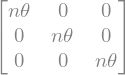

In [55]:
C = c_bold * c_bold.T
sp.integrate(
    sp.integrate(
        sp.integrate(g * C, (cz, -sp.oo, sp.oo)), (cy, -sp.oo, sp.oo)), (cx, -sp.oo, sp.oo))

In [56]:
Cc = C * c_bold
sp.integrate(
    sp.integrate(
        sp.integrate(g * Cc, (cz, -sp.oo, sp.oo)), (cy, -sp.oo, sp.oo)), (cx, -sp.oo, sp.oo))

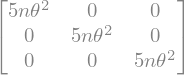

In [57]:
Cc2 = C * c_bold.dot(c_bold)
sp.integrate(
    sp.integrate(
        sp.integrate(g * Cc2, (cz, -sp.oo, sp.oo)), (cy, -sp.oo, sp.oo)), (cx, -sp.oo, sp.oo))

## D1Q5 Lattice Weights [2]

Here I investigate the discrete formulation of a 1D equilibrium distribution function $f^{eq}$ for a D1Q5 lattice. This example is provided in Chapter 4 of [2]. Note: the equilibriun distribution is not obtained using the low-Mach number Equilibrium distribution function of isothermal LBM models. But rather, the equilibrium distribution is obtained by solving the linear system of equations for the weights.

In [58]:
# Define the symbols for this exercise
v, u, c = sp.symbols('v, u, c', real=True)
n, th = sp.symbols('n theta', positive=True, real=True)
g = sp.symbols('g:5', real=True)

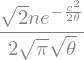

In [59]:
# Define the 1D version of a Gaussian distribution function
g1D = n / (2 * sp.pi * th)**(sp.Rational(1,2)) * sp.exp(-(c**2)/(2*th)) 
display(g1D)

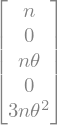

In [60]:
# The first 5 integral moments (they become our solution vector: rhs) :
C = sp.Matrix([c**i for i in range(5)])
rhs = sp.integrate(g1D * C, (c, -sp.oo, sp.oo))
display(rhs)

In [61]:
g = sp.Matrix(g)
v = sp.Matrix([-2*c, -c, 0, c, 2*c])

In [62]:
A = sp.Matrix([
    [1, (v[0] - u), (v[0] - u)**2, (v[0] - u)**3, (v[0] - u)**4], \
    [1, (v[1] - u), (v[1] - u)**2, (v[1] - u)**3, (v[1] - u)**4], \
    [1, (v[2] - u), (v[2] - u)**2, (v[2] - u)**3, (v[2] - u)**4], \
    [1, (v[3] - u), (v[3] - u)**2, (v[3] - u)**3, (v[3] - u)**4], \
    [1, (v[4] - u), (v[4] - u)**2, (v[4] - u)**3, (v[4] - u)**4]]).T

g = A.inv() * rhs

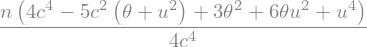

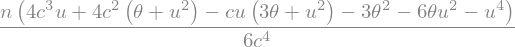

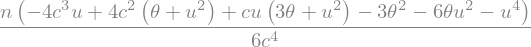

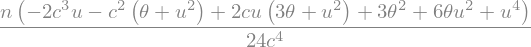

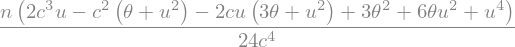

In [63]:
# Display the discrete equilibrium distribution function:
display(g[2].expand().simplify())
display(g[3].expand().simplify())
display(g[1].expand().simplify())
display(g[4].expand().simplify())
display(g[0].expand().simplify())

We have obtained the discrete equilibrium distribution function reported in [2] capable of handling the compressible flow of a 1-D lattice Boltzmann model using 5 discrete velocities.

## D1Q5 Lattice Weights [3]

This is the D1Q5 reported by Paul Dellar [3] for solving compressible flows using a finite volume formulation of the lattice Boltzmann method.

In [69]:
# Define the symbols for this exercise
xi, w, u, c = sp.symbols('xi, w, u, c', real=True)
n, th = sp.symbols('n theta', positive=True, real=True)
g = sp.symbols('g:5', real=True)

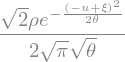

In [70]:
# Define the 1D version of a Gaussian distribution function
g1D = rho / (2 * sp.pi * th)**(sp.Rational(1,2)) * sp.exp(-((xi-u)**2)/(2*th))
display(g1D)

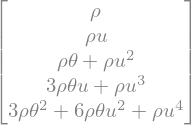

In [71]:
# The first 5 integral moments (they become our solution vector: rhs) :
XI = sp.Matrix([xi**i for i in range(5)])
rhs = sp.integrate(g1D * XI, (xi, -sp.oo, sp.oo))
display(rhs)

In [72]:
g = sp.Matrix(g)
W = sp.Matrix([1/12, 1/6, 1/2, 1/6, 1/12])
V = sp.Matrix([-2, -1, 0, 1, 2]) # xi values

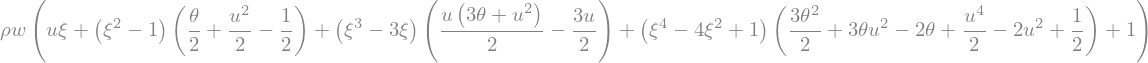

In [73]:
# The discrete equilibrium distribution function provided by Dellar in [3]:
g0 = sp.Lambda((w,xi), rho * w * (1 + u * xi + \
                   0.5 * (th + u**2 - 1) * (xi**2 - 1) + \
                   0.5 * (u * (3 * th + u**2) - 3 * u ) * (xi**3  - 3 * xi) + \
                   0.5 * (3*th**2 + 6 * th * u**2 + u**4 - 4 * (th + u**2) + 1) * (xi**4 - 4 * xi**2 + 1)))

w, xi = sp.symbols('w xi', real=True)
display(g0(w, xi).nsimplify())

In [74]:
[(g0(W[0],V[0]) + g0(W[1],V[1]) + g0(W[2],V[2]) + g0(W[3],V[3]) + g0(W[4],V[4])).expand().nsimplify(tolerance=1e-10),
(g0(W[0],V[0]) * V[0]**1 + g0(W[1],V[1]) * V[1]**1 + g0(W[2],V[2]) * V[2]**1 + g0(W[3],V[3]) * V[3]**1 + g0(W[4],V[4]) * V[4]**1).expand().nsimplify(),
(g0(W[0],V[0]) * V[0]**2 + g0(W[1],V[1]) * V[1]**2 + g0(W[2],V[2]) * V[2]**2 + g0(W[3],V[3]) * V[3]**2 + g0(W[4],V[4]) * V[4]**2).expand().nsimplify(),
(g0(W[0],V[0]) * V[0]**3 + g0(W[1],V[1]) * V[1]**3 + g0(W[2],V[2]) * V[2]**3 + g0(W[3],V[3]) * V[3]**3 + g0(W[4],V[4]) * V[4]**3).expand().nsimplify(),
(g0(W[0],V[0]) * V[0]**4 + g0(W[1],V[1]) * V[1]**4 + g0(W[2],V[2]) * V[2]**4 + g0(W[3],V[3]) * V[3]**4 + g0(W[4],V[4]) * V[4]**4).expand().nsimplify()]

The equilibrium distribution is works correctly!!
But how was this equilibrium distribution obtained?

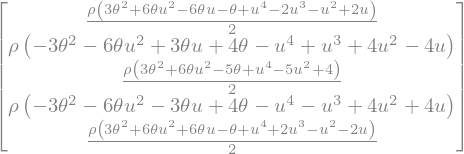

In [75]:
A = sp.Matrix([
    [W[0], W[0]*V[0]**1, W[0]*V[0]**2, W[0]*V[0]**3, W[0]*V[0]**4], \
    [W[1], W[1]*V[1]**1, W[1]*V[1]**2, W[1]*V[1]**3, W[1]*V[1]**4], \
    [W[2], W[2]*V[2]**1, W[2]*V[2]**2, W[2]*V[2]**3, W[2]*V[2]**4], \
    [W[3], W[3]*V[3]**1, W[3]*V[3]**2, W[3]*V[3]**3, W[3]*V[3]**4], \
    [W[4], W[4]*V[4]**1, W[4]*V[4]**2, W[4]*V[4]**3, W[4]*V[4]**4]]).T

g = A.inv() * rhs
g.nsimplify(tolerance=1e-10).simplify()

### NOTE: 
* From here a game of matching coefficients needs to be carried out in order to recover the formulation by Dellar [2].
* This formulation is very similar to that obtained using Hermite polynomials expansion. I'll come back to this later.

## D1Q3, D1Q4 & D1Q5 Lattice Weights [4]

In [4], Yang et al. proposed three 1D equilibrium distribution function $f^{eq}$ for D1Q3, D1Q4 and D1Q5 lattices to be used as flux for an unstructed finite volume solver for compressible flows.

In [76]:
# Define the symbols for this exercise
xi, u, c = sp.symbols('xi, u, c', real=True)
rho, th = sp.symbols('rho theta', positive=True, real=True)
d, d1, d2 = sp.symbols('d d_1 d_2', positive=True, real=True)
g = sp.symbols('g:7', real=True)

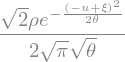

In [77]:
# Define the 1D version of a Gaussian distribution function
g1D = rho / (2 * sp.pi * th)**(sp.Rational(1,2)) * sp.exp(-((xi-u)**2)/(2*th))
display(g1D)

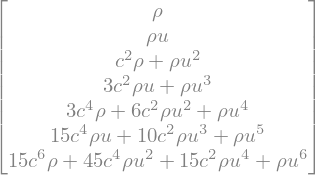

In [78]:
# The first 5 integral moments (they become our solution vector: rhs) :
C = sp.Matrix([xi**i for i in range(7)])
rhs = sp.integrate(g1D * C, (xi, -sp.oo, sp.oo))
rhs = rhs.subs(th, c**2)
display(rhs)

### D1Q3 Lattice

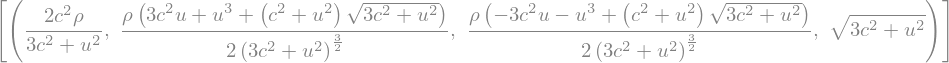

In [79]:
eq1 = sp.Eq(rhs[0], g[0] + g[1] + g[2])
eq2 = sp.Eq(rhs[1], g[1] * d**1 + g[2] * (-d)**1)
eq3 = sp.Eq(rhs[2], g[1] * d**2 + g[2] * (-d)**2)
eq4 = sp.Eq(rhs[3], g[1] * d**3 + g[2] * (-d)**3)
sol_D1Q3 = sp.solve([eq1, eq2, eq3, eq4], g[0], g[1], g[2], d)
display(sol_D1Q3)

Yes, these are the weights for the D1Q3 lattice as reported in [4].

### D1Q4 Lattice

In [80]:
eq1 = sp.Eq(rhs[0], g[0] + g[1] + g[2] + g[3])
eq2 = sp.Eq(rhs[1], g[0] * d1**1 + g[1] * (-d1)**1 + g[2] * d2**1 + g[3] * (-d2)**1)
eq3 = sp.Eq(rhs[2], g[0] * d1**2 + g[1] * (-d1)**2 + g[2] * d2**2 + g[3] * (-d2)**2)
eq4 = sp.Eq(rhs[3], g[0] * d1**3 + g[1] * (-d1)**3 + g[2] * d2**3 + g[3] * (-d2)**3)
eq5 = sp.Eq(rhs[4], g[0] * d1**4 + g[1] * (-d1)**4 + g[2] * d2**4 + g[3] * (-d2)**4)
eq6 = sp.Eq(rhs[5], g[0] * d1**5 + g[1] * (-d1)**5 + g[2] * d2**5 + g[3] * (-d2)**5)
sol_D1Q4 = sp.solve([eq1, eq2, eq3, eq4, eq5, eq6], g[0], g[1], g[2], g[3], d1, d2)

In [81]:
# display(sol_D1Q4[0][0], sol_D1Q4[0][1], sol_D1Q4[0][2], sol_D1Q4[0][3])
# The solution of D1Q4 are too long to display!

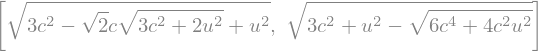

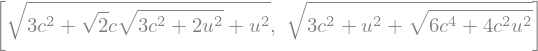

In [82]:
display([sol_D1Q4[0][4], sp.sqrt(u**2 + 3*c**2 - sp.sqrt(4*(u*c)**2 + 6*c**4))])
display([sol_D1Q4[0][5], sp.sqrt(u**2 + 3*c**2 + sp.sqrt(4*(u*c)**2 + 6*c**4))])

Yes, these are the d_1, d_2 weights for the D1Q3 lattice as reported in [4].

### D1Q5 Lattice

In [83]:
eq1 = sp.Eq(rhs[0], g[0] + g[1] + g[2] + g[3] + g[4])
eq2 = sp.Eq(rhs[1], g[1] * d1**1 + g[2] * (-d1)**1 + g[3] * d2**1 + g[4] * (-d2)**1)
eq3 = sp.Eq(rhs[2], g[1] * d1**2 + g[2] * (-d1)**2 + g[3] * d2**2 + g[4] * (-d2)**2)
eq4 = sp.Eq(rhs[3], g[1] * d1**3 + g[2] * (-d1)**3 + g[3] * d2**3 + g[4] * (-d2)**3)
eq5 = sp.Eq(rhs[4], g[1] * d1**4 + g[2] * (-d1)**4 + g[3] * d2**4 + g[4] * (-d2)**4)
eq6 = sp.Eq(rhs[5], g[1] * d1**5 + g[2] * (-d1)**5 + g[3] * d2**5 + g[4] * (-d2)**5)
eq7 = sp.Eq(rhs[6], g[1] * d1**6 + g[2] * (-d1)**6 + g[3] * d2**6 + g[4] * (-d2)**6)
sol_D1Q5 = sp.solve([eq1, eq2, eq3, eq4, eq5, eq6, eq7], g[0], g[1], g[2], g[3], g[4], d1, d2)

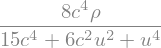

In [84]:
sol_D1Q5[0][0]

In [85]:
# display(sol_D1Q4[0][1], sol_D1Q4[0][2], sol_D1Q4[0][3], sol_D1Q4[0][4])
# The solutions for g_1, g_2, g_3, g_4 are too long to display!

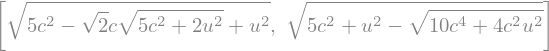

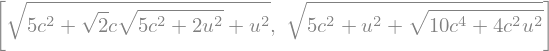

In [86]:
display([sol_D1Q5[0][5], sp.sqrt(u**2 + 5*c**2 - sp.sqrt(4*(u*c)**2 + 10*c**4))])
display([sol_D1Q5[0][6], sp.sqrt(u**2 + 5*c**2 + sp.sqrt(4*(u*c)**2 + 10*c**4))])

Yes, these are the d_1, d_2 weights for the D1Q3 lattice as reported in [4].